In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split




import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to keep the output clean.

# Read and Explore the dataset

In [2]:
df=pd.read_excel(r"D:\100 Days machine learning\PROJECTS\Churn Prediction\E_Commerce_Dataset.xlsx",sheet_name='E Comm')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [10]:
df.drop(columns='CustomerID',inplace=True)

In [11]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [12]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [13]:
df.columns=df.columns.str.lower()

In [14]:
df.head()

,churn,tenure,preferredlogindevice,citytier,warehousetohome,preferredpaymentmode,gender,hourspendonapp,numberofdeviceregistered,preferedordercat,satisfactionscore,maritalstatus,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Create plots

In [15]:
hist_col=[]
count_col=[]
for column in df.columns:
    unique_value=df[column].nunique()
    if(unique_value>=20):
        hist_col.append(column)
    else:
        count_col.append(column)

In [16]:
hist_col

['tenure', 'warehousetohome', 'daysincelastorder', 'cashbackamount']

In [17]:
count_col

['churn',
 'preferredlogindevice',
 'citytier',
 'preferredpaymentmode',
 'gender',
 'hourspendonapp',
 'numberofdeviceregistered',
 'preferedordercat',
 'satisfactionscore',
 'maritalstatus',
 'numberofaddress',
 'complain',
 'orderamounthikefromlastyear',
 'couponused',
 'ordercount']

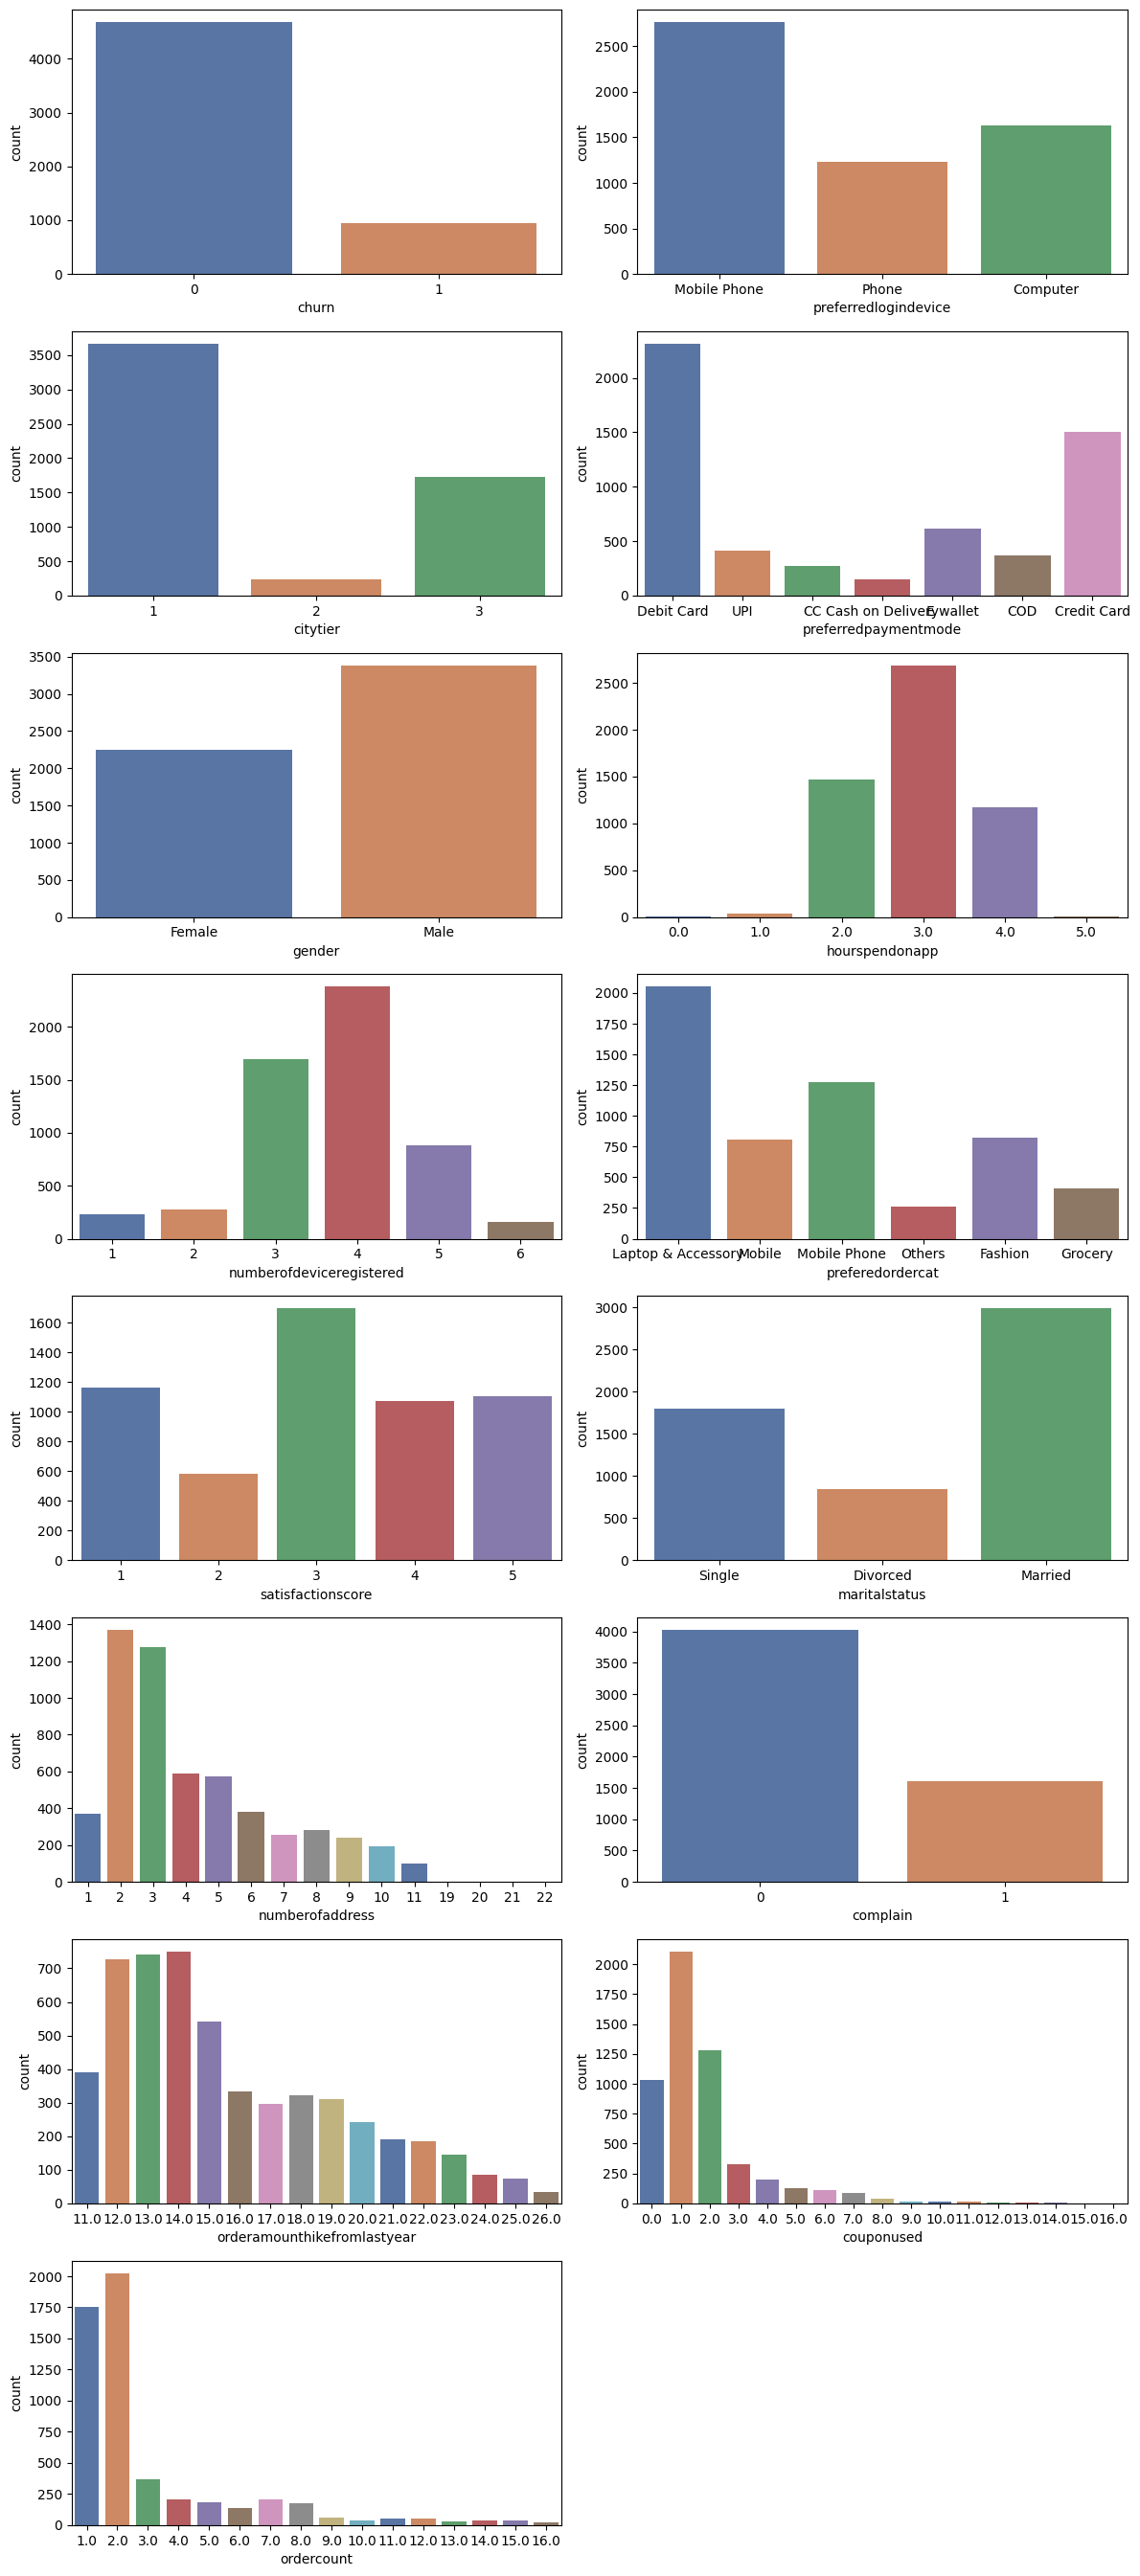

In [18]:
plt.figure(figsize=(12,40))
plt_num=1
for col in count_col:
    plt.subplot(12,2,plt_num)
    sns.countplot(data=df,x=col,palette='deep',hue=col,legend=False)
    plt_num += 1
    plt.tight_layout()



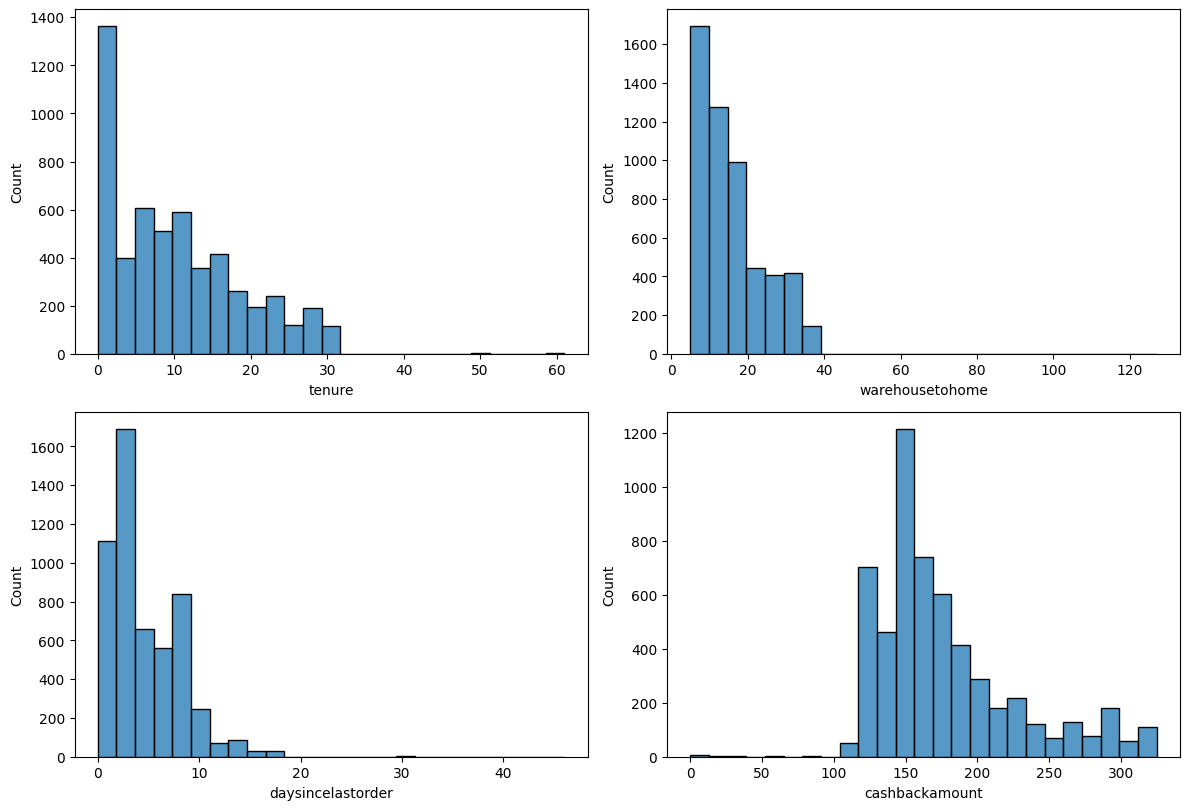

In [19]:
plt.figure(figsize=(12,40))
plt_num=1
for cols in hist_col:
    plt.subplot(10,2,plt_num)
    sns.histplot(data=df, x=cols,bins=25)   
    plt_num+=1
    plt.tight_layout()


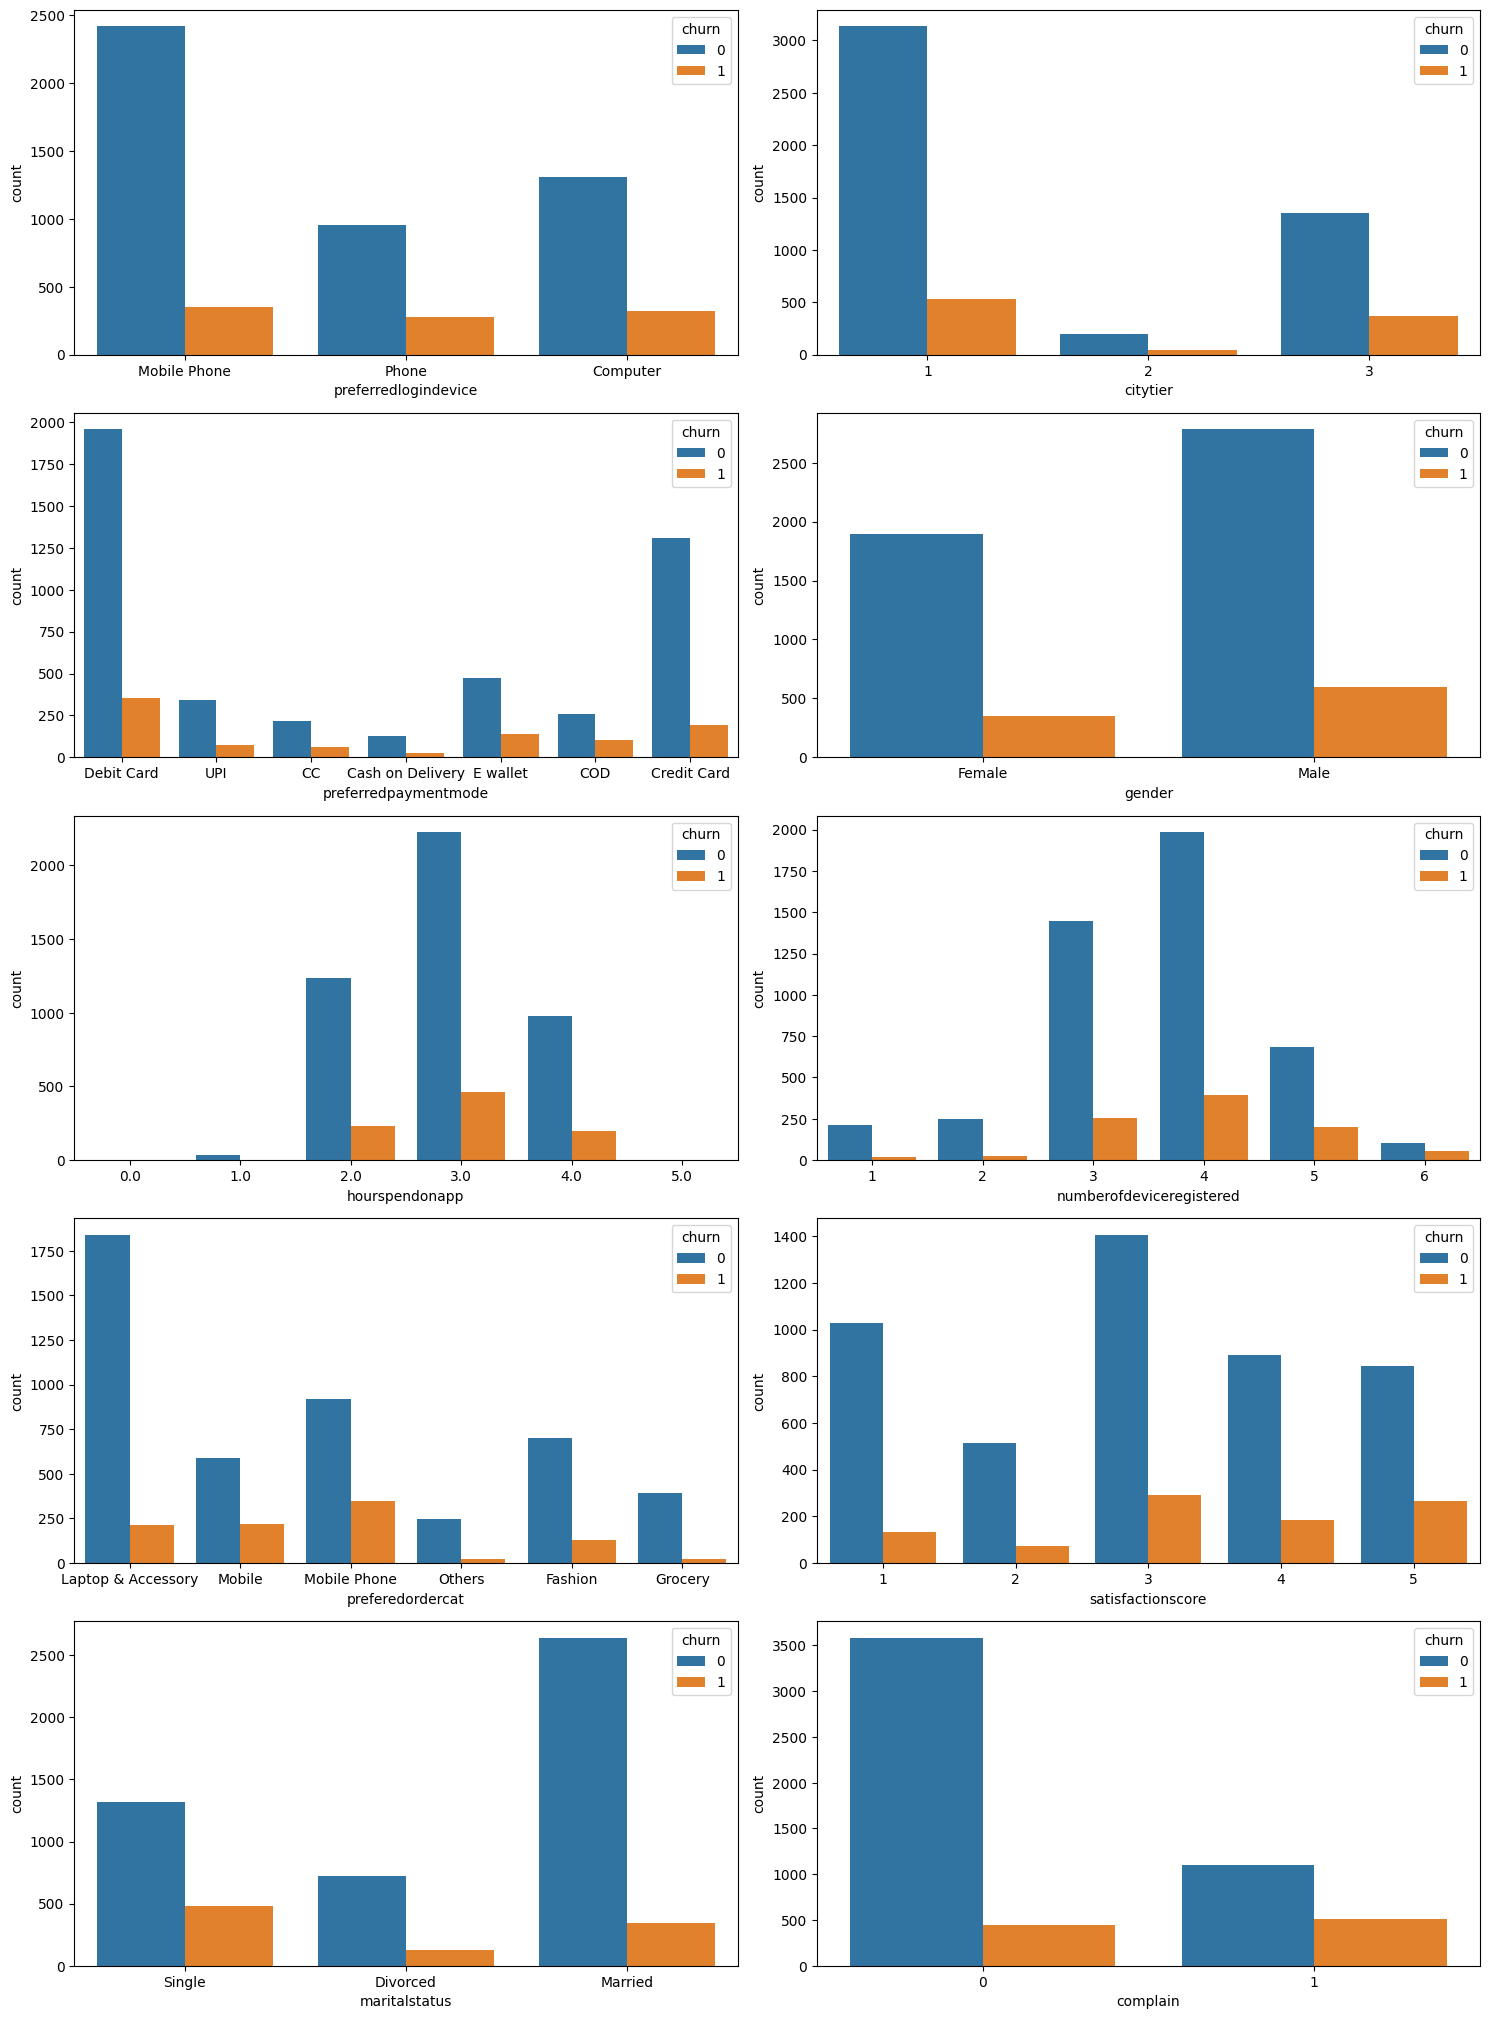

In [20]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <=8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

### Impute Missing Values

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
import pandas as pd


In [22]:
def filling_missing_val(df, random_state=42):
    # Taking out the columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_col = df.select_dtypes(include=['string', 'object']).columns.tolist()

    # Simple Imputer for numerical columns
    if numeric_cols:
        s_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = s_imputer.fit_transform(df[numeric_cols])

    # Categorical columns using OHE
    if categorical_col:
        ohe_imputer = OneHotEncoder(sparse_output=False, drop='first')
        ohe_array = ohe_imputer.fit_transform(df[categorical_col])

        # Convert encoded data back to DataFrame with feature names
        ohe_df = pd.DataFrame(ohe_array, columns=ohe_imputer.get_feature_names_out(categorical_col))

        # Drop original categorical columns and concatenate encoded columns
        df = pd.concat([df.drop(columns=categorical_col), ohe_df], axis=1)

    # Iterative Imputer for more accuracy
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state), max_iter=10)
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

    return df


In [23]:
df=filling_missing_val(df,random_state=42)

In [24]:
df.isnull().sum()

churn                                    0
tenure                                   0
citytier                                 0
warehousetohome                          0
hourspendonapp                           0
numberofdeviceregistered                 0
satisfactionscore                        0
numberofaddress                          0
complain                                 0
orderamounthikefromlastyear              0
couponused                               0
ordercount                               0
daysincelastorder                        0
cashbackamount                           0
preferredlogindevice_Mobile Phone        0
preferredlogindevice_Phone               0
preferredpaymentmode_COD                 0
preferredpaymentmode_Cash on Delivery    0
preferredpaymentmode_Credit Card         0
preferredpaymentmode_Debit Card          0
preferredpaymentmode_E wallet            0
preferredpaymentmode_UPI                 0
gender_Male                              0
preferedord

# Model Building

## Split Dataset into Training set and Test set

In [25]:
X = df.drop(columns=["churn"])
y = df["churn"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train.shape

(4504, 29)

In [27]:
y_train.shape

(4504,)

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
(sum(y_train==0))

3743

In [30]:
(sum(y_train==1))

761

### need to balance this 

In [31]:
sm=SMOTE(sampling_strategy=1,random_state=0)

In [32]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 3743
Before upsampling count of label 1 761
After upsampling count of label 0 3743
After upsampling count of label 1 3743


In [33]:
df.columns

Index(['churn', 'tenure', 'citytier', 'warehousetohome', 'hourspendonapp',
       'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress',
       'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount',
       'preferredlogindevice_Mobile Phone', 'preferredlogindevice_Phone',
       'preferredpaymentmode_COD', 'preferredpaymentmode_Cash on Delivery',
       'preferredpaymentmode_Credit Card', 'preferredpaymentmode_Debit Card',
       'preferredpaymentmode_E wallet', 'preferredpaymentmode_UPI',
       'gender_Male', 'preferedordercat_Grocery',
       'preferedordercat_Laptop & Accessory', 'preferedordercat_Mobile',
       'preferedordercat_Mobile Phone', 'preferedordercat_Others',
       'maritalstatus_Married', 'maritalstatus_Single'],
      dtype='object')

In [34]:
df['preferedordercat'].info()

KeyError: 'preferedordercat'

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV,RidgeClassifierCV,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
import sklearn
sklearn.set_config(enable_metadata_routing=False)


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import (
    AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd

# Initialize the models
models = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    LogisticRegressionCV(max_iter=1000),  # Ensure convergence
    RidgeClassifierCV(),
    KNeighborsClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Prevent common warnings
]

# Define metrics and lists
metrics_cols = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
model_name, test_accuracy, test_precision, test_recall, test_f1 = [], [], [], [], []

# Model evaluation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


In [37]:
for model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_accuracy.append(round(cv_results['test_accuracy'].mean(), 3) * 100)
    test_precision.append(round(cv_results['test_precision_macro'].mean(), 3) * 100)
    test_recall.append(round(cv_results['test_recall_macro'].mean(), 3) * 100)
    test_f1.append(round(cv_results['test_f1_macro'].mean(), 3) * 100)

# Create a DataFrame for metrics
metrics_data = [model_name, test_accuracy, test_precision, test_recall, test_f1]
metrics_dict = {col: data for col, data in zip(metrics_cols, metrics_data)}
model_metrics = pd.DataFrame(metrics_dict)

# Sort and style the results
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(
    subset=['test_accuracy', 'test_f1'], cmap='summer'
)

metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
7,XGBClassifier,99.300000,99.000000,98.500000,98.800000
3,RandomForestClassifier,98.800000,98.900000,96.700000,97.800000
1,BaggingClassifier,97.600000,97.400000,94.000000,95.600000
2,GradientBoostingClassifier,91.900000,89.100000,80.200000,83.700000
0,AdaBoostClassifier,89.800000,83.700000,77.300000,79.900000
4,LogisticRegressionCV,89.400000,84.500000,74.100000,77.800000
6,KNeighborsClassifier,87.500000,80.100000,70.300000,73.600000
5,RidgeClassifierCV,87.400000,86.900000,64.600000,68.700000
